In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
data = pd.read_csv('cardekho.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [163]:
# replace ' ' with NaN
data.replace(' ', np.nan, inplace=True)
data['max_power'] = data['max_power'].astype(float)


In [164]:
# group by car name and fill null values in engine, power, seats with mean of that car
data['engine'] = data.groupby('name')['engine'].transform(lambda x: x.fillna(x.mean()))
data['max_power'] = data.groupby('name')['max_power'].transform(lambda x: x.fillna(x.mean()))
data['seats'] = data.groupby('name')['seats'].transform(lambda x: x.fillna(x.mean()))

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7968 non-null   float64
 10  max_power           7967 non-null   float64
 11  seats               7968 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [166]:
data.dropna(inplace=True)

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7906 non-null   object 
 1   year                7906 non-null   int64  
 2   selling_price       7906 non-null   int64  
 3   km_driven           7906 non-null   int64  
 4   fuel                7906 non-null   object 
 5   seller_type         7906 non-null   object 
 6   transmission        7906 non-null   object 
 7   owner               7906 non-null   object 
 8   mileage(km/ltr/kg)  7906 non-null   float64
 9   engine              7906 non-null   float64
 10  max_power           7906 non-null   float64
 11  seats               7906 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 803.0+ KB


In [168]:
#rename mileage column
data.rename(columns={'mileage(km/ltr/kg)':'mileage_kmpl'}, inplace=True)

In [169]:
#reset index
data.reset_index(drop=True, inplace=True)

In [170]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [171]:
data['manufacturer'] = data['name'].apply(lambda x: x.split()[0].lower())

In [172]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine,max_power,seats,manufacturer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,maruti


In [173]:
data['owner'] = data['owner'].apply(lambda x: x.split()[0].lower())

In [174]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine,max_power,seats,manufacturer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,first,23.40,1248.0,74.00,5.0,maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,second,21.14,1498.0,103.52,5.0,skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,third,17.70,1497.0,78.00,5.0,honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,first,23.00,1396.0,90.00,5.0,hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,first,16.10,1298.0,88.20,5.0,maruti


In [175]:
data['manufacturer'].value_counts()

manufacturer
maruti           2367
hyundai          1360
mahindra          758
tata              719
honda             466
toyota            452
ford              388
chevrolet         230
renault           228
volkswagen        185
bmw               118
skoda             104
nissan             81
jaguar             71
volvo              67
datsun             65
mercedes-benz      54
fiat               41
audi               40
lexus              34
jeep               31
mitsubishi         14
force               6
land                6
isuzu               5
kia                 4
ambassador          4
daewoo              3
mg                  3
ashok               1
opel                1
Name: count, dtype: int64

In [176]:
# remove manufacturer with less than 10 cars
data = data.groupby('manufacturer').filter(lambda x: len(x) > 10)


In [177]:
data['manufacturer'].value_counts()

manufacturer
maruti           2367
hyundai          1360
mahindra          758
tata              719
honda             466
toyota            452
ford              388
chevrolet         230
renault           228
volkswagen        185
bmw               118
skoda             104
nissan             81
jaguar             71
volvo              67
datsun             65
mercedes-benz      54
fiat               41
audi               40
lexus              34
jeep               31
mitsubishi         14
Name: count, dtype: int64

In [178]:
data.groupby('manufacturer')['selling_price'].mean().sort_values(ascending=False)

manufacturer
lexus            5.150000e+06
bmw              4.153814e+06
volvo            3.272015e+06
jaguar           2.915465e+06
audi             2.612200e+06
mercedes-benz    2.470444e+06
jeep             2.149613e+06
toyota           1.011920e+06
mitsubishi       8.175000e+05
mahindra         6.300211e+05
skoda            6.097211e+05
honda            5.969209e+05
ford             5.208737e+05
volkswagen       4.898919e+05
hyundai          4.732805e+05
nissan           4.654074e+05
renault          4.626184e+05
maruti           4.090111e+05
tata             3.618538e+05
fiat             3.171951e+05
datsun           3.146000e+05
chevrolet        2.738675e+05
Name: selling_price, dtype: float64

In [179]:
high_end = ['bmw', 'jaguar', 'audi', 'mercedes-benz', 'lexus', 'jeep']
data['high_end'] = data['manufacturer'].apply(lambda x: 1 if x in high_end else 0)
data.drop('manufacturer', axis=1, inplace=True)

In [180]:
data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine,max_power,seats,high_end
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,first,23.40,1248.0,74.00,5.0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,second,21.14,1498.0,103.52,5.0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,third,17.70,1497.0,78.00,5.0,0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,first,23.00,1396.0,90.00,5.0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,first,16.10,1298.0,88.20,5.0,0


In [181]:
data['owner'] = data['owner'].apply(lambda x: 'first' if x == 'test' else x)
data['owner'] = data['owner'].apply(lambda x: 'higher' if x in ['third', 'fourth'] else x)
data['owner'].value_counts()

owner
first     5196
second    2010
higher     667
Name: count, dtype: int64

In [182]:
data['seats'].value_counts() 

seats
5.0     6233
7.0     1109
8.0      234
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64

In [183]:
data = data.groupby('seats').filter(lambda x: len(x) > 10)

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7870 entries, 0 to 7905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7870 non-null   object 
 1   year           7870 non-null   int64  
 2   selling_price  7870 non-null   int64  
 3   km_driven      7870 non-null   int64  
 4   fuel           7870 non-null   object 
 5   seller_type    7870 non-null   object 
 6   transmission   7870 non-null   object 
 7   owner          7870 non-null   object 
 8   mileage_kmpl   7870 non-null   float64
 9   engine         7870 non-null   float64
 10  max_power      7870 non-null   float64
 11  seats          7870 non-null   float64
 12  high_end       7870 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 860.8+ KB


In [185]:
data = data[(data['fuel'] != 'CNG') & (data['fuel'] != 'LPG')]

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7783 entries, 0 to 7905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7783 non-null   object 
 1   year           7783 non-null   int64  
 2   selling_price  7783 non-null   int64  
 3   km_driven      7783 non-null   int64  
 4   fuel           7783 non-null   object 
 5   seller_type    7783 non-null   object 
 6   transmission   7783 non-null   object 
 7   owner          7783 non-null   object 
 8   mileage_kmpl   7783 non-null   float64
 9   engine         7783 non-null   float64
 10  max_power      7783 non-null   float64
 11  seats          7783 non-null   float64
 12  high_end       7783 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 851.3+ KB


In [187]:
data.drop('name', axis=1, inplace=True)

In [188]:
data.head(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine,max_power,seats,high_end
0,2014,450000,145500,Diesel,Individual,Manual,first,23.40,1248.0,74.00,5.0,0
1,2014,370000,120000,Diesel,Individual,Manual,second,21.14,1498.0,103.52,5.0,0
2,2006,158000,140000,Petrol,Individual,Manual,higher,17.70,1497.0,78.00,5.0,0
3,2010,225000,127000,Diesel,Individual,Manual,first,23.00,1396.0,90.00,5.0,0
4,2007,130000,120000,Petrol,Individual,Manual,first,16.10,1298.0,88.20,5.0,0


In [189]:
data['km_driven_log'] = np.log(data['km_driven'])
data['selling_price_log'] = np.log(data['selling_price'])
data['transmission'] = data['transmission'].apply(lambda x: 1 if x == 'Automatic' else 0)
data['fuel'] = data['fuel'].apply(lambda x: 1 if x == 'Diesel' else 0)


In [190]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine,max_power,seats,high_end,km_driven_log,selling_price_log
0,2014,450000,145500,1,Individual,0,first,23.40,1248.0,74.00,5.0,0,11.887931,13.017003
1,2014,370000,120000,1,Individual,0,second,21.14,1498.0,103.52,5.0,0,11.695247,12.821258
2,2006,158000,140000,0,Individual,0,higher,17.70,1497.0,78.00,5.0,0,11.849398,11.970350
3,2010,225000,127000,1,Individual,0,first,23.00,1396.0,90.00,5.0,0,11.751942,12.323856
4,2007,130000,120000,0,Individual,0,first,16.10,1298.0,88.20,5.0,0,11.695247,11.775290


In [191]:
data['seller_type'].value_counts()

seller_type
Individual          6454
Dealer              1093
Trustmark Dealer     236
Name: count, dtype: int64

In [192]:
data.groupby(['seller_type', 'owner', 'high_end'])['selling_price'].mean()


seller_type       owner   high_end
Dealer            first   0           7.464368e+05
                          1           4.025384e+06
                  higher  0           2.962500e+05
                  second  0           5.976000e+05
                          1           1.546571e+06
Individual        first   0           5.769871e+05
                          1           2.360652e+06
                  higher  0           2.692875e+05
                          1           1.077857e+06
                  second  0           3.648621e+05
                          1           1.567355e+06
Trustmark Dealer  first   0           8.127291e+05
                  second  0           7.348485e+05
Name: selling_price, dtype: float64

In [193]:
data['seller_type'] = data['seller_type'].apply(lambda x: 1 if x == 'Individual' else 0)
owner_map = {'first': 1, 'second': 2, 'higher': 3}
data['owner'] = data['owner'].map(owner_map)

In [194]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine,max_power,seats,high_end,km_driven_log,selling_price_log
0,2014,450000,145500,1,1,0,1,23.40,1248.0,74.00,5.0,0,11.887931,13.017003
1,2014,370000,120000,1,1,0,2,21.14,1498.0,103.52,5.0,0,11.695247,12.821258
2,2006,158000,140000,0,1,0,3,17.70,1497.0,78.00,5.0,0,11.849398,11.970350
3,2010,225000,127000,1,1,0,1,23.00,1396.0,90.00,5.0,0,11.751942,12.323856
4,2007,130000,120000,0,1,0,1,16.10,1298.0,88.20,5.0,0,11.695247,11.775290


In [195]:
data['age'] = 2021 - data['year']

In [196]:
data.head(20)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine,max_power,seats,high_end,km_driven_log,selling_price_log,age
0,2014,450000,145500,1,1,0,1,23.40,1248.0,74.00,5.0,0,11.887931,13.017003,7
1,2014,370000,120000,1,1,0,2,21.14,1498.0,103.52,5.0,0,11.695247,12.821258,7
2,2006,158000,140000,0,1,0,3,17.70,1497.0,78.00,5.0,0,11.849398,11.970350,15
3,2010,225000,127000,1,1,0,1,23.00,1396.0,90.00,5.0,0,11.751942,12.323856,11
4,2007,130000,120000,0,1,0,1,16.10,1298.0,88.20,5.0,0,11.695247,11.775290,14
5,2017,440000,45000,0,1,0,1,20.14,1197.0,81.86,5.0,0,10.714418,12.994530,4
7,2001,45000,5000,0,1,0,2,16.10,796.0,37.00,4.0,0,8.517193,10.714418,20
8,2011,350000,90000,1,1,0,1,23.59,1364.0,67.10,5.0,0,11.407565,12.765688,10
9,2013,200000,169000,1,1,0,1,20.00,1399.0,68.10,5.0,0,12.037654,12.206073,8
10,2014,500000,68000,1,1,0,2,19.01,1461.0,108.45,5.0,0,11.127263,13.122363,7


In [197]:
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage_kmpl', 'engine', 'max_power', 'seats',
       'high_end', 'km_driven_log', 'selling_price_log', 'age'],
      dtype='object')

<Axes: >

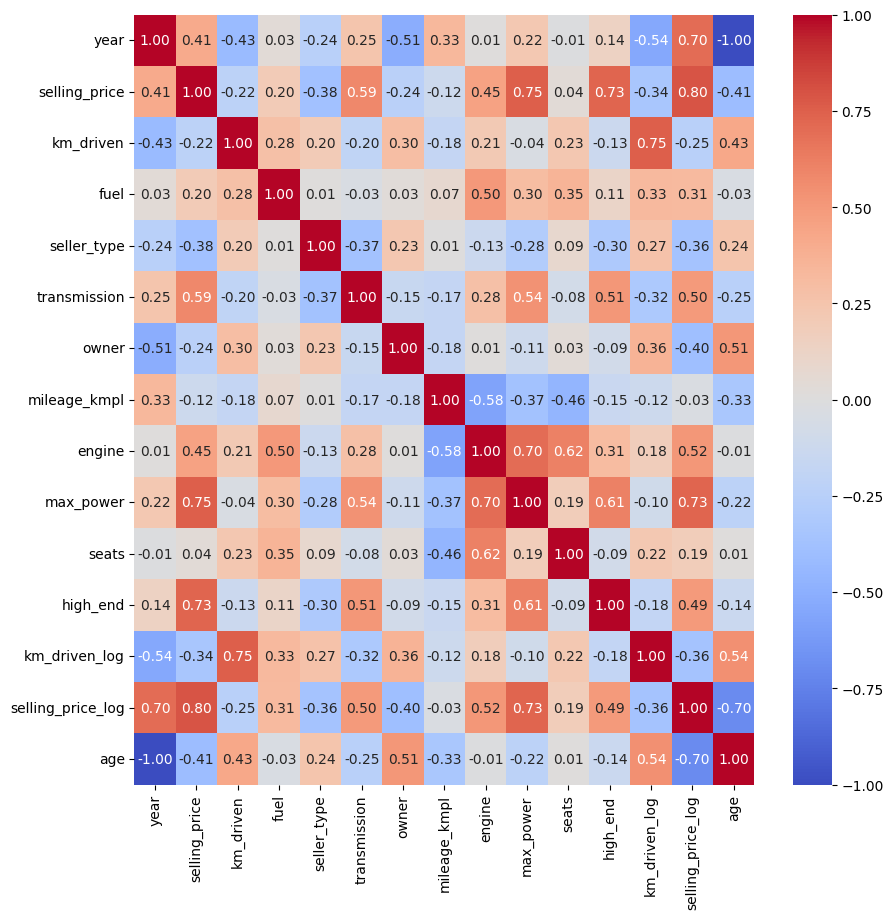

In [198]:
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt = '.2f', center=0)    

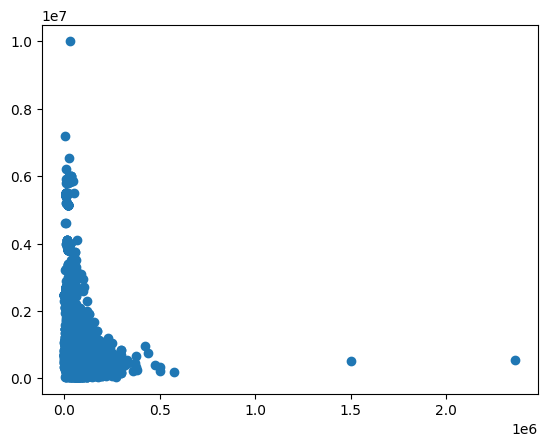

In [199]:
plt.scatter(data['km_driven'], data['selling_price'])

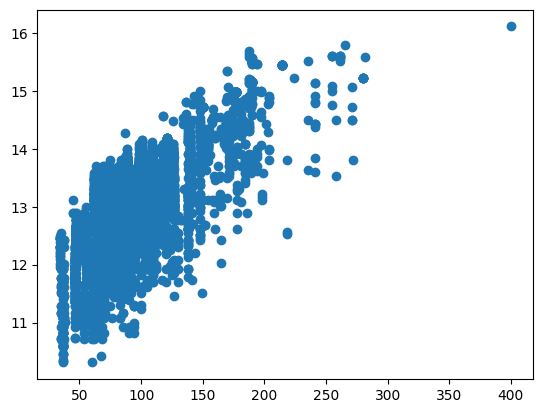

In [202]:
plt.scatter(data['max_power'], data['selling_price_log'])

In [203]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine,max_power,seats,high_end,km_driven_log,selling_price_log,age
0,2014,450000,145500,1,1,0,1,23.40,1248.0,74.00,5.0,0,11.887931,13.017003,7
1,2014,370000,120000,1,1,0,2,21.14,1498.0,103.52,5.0,0,11.695247,12.821258,7
2,2006,158000,140000,0,1,0,3,17.70,1497.0,78.00,5.0,0,11.849398,11.970350,15
3,2010,225000,127000,1,1,0,1,23.00,1396.0,90.00,5.0,0,11.751942,12.323856,11
4,2007,130000,120000,0,1,0,1,16.10,1298.0,88.20,5.0,0,11.695247,11.775290,14
